#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 6
### Due: Monday, Mar 14th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on March 14th (after Spring Break).

---

## Problem 1

**The Leavitt Law**

Cepheid variable stars in galaxies follow a linear relation between their log periods, log metallicity, and apparent magnitude (the Leavitt law):

$$m_i^W = zp_{W,N4258} + b_W \log P_i + Z_w \Delta \log (O/H)_i \;\;\; (1)$$

where 
$$m^W = m_H - 0.39(V-I)$$

and is called the "Wesenheit magnitude".

The index $i$ here denotes the individual Cepheids in a sample.


Download table 4 from Riess et al. (2016):

https://ui.adsabs.harvard.edu/abs/2016yCat..18260056R/abstract

You will find the tables here:
https://cdsarc.cds.unistra.fr/viz-bin/cat/J/ApJ/826/56#/browse
Table descriptions are in the readme file.

Use the data for Cepheids in NGC 4258 from Table 4. Assuming that there is no intrinsic scatter in the Leavitt law, the parameters
of Equation (1) can be determined through ordinary least squares. Determine the best-fit
parameters $zp_{W,N4258}$, $b_W$, and $Z_w$ and their Gaussian covariance matrix. Plot the data $m^W_i$ vs. $\log_{10} P_i$ and overlay the best fit model (evaluated at the mean metallicity of the sample).








### Solution

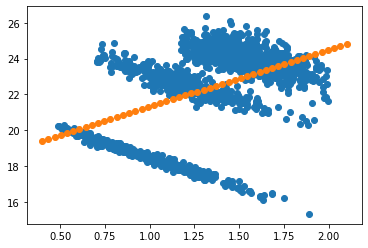

[[ 4.36607096e+01 -1.07885974e-01 -1.98106507e+01]
 [-1.07885974e-01  5.31801285e-03  4.20092991e-02]
 [-1.98106507e+01  4.20092991e-02  8.99906667e+00]]


In [148]:
import numpy as np
import scipy as sc
%matplotlib inline
import matplotlib.pyplot as plt

data = np.loadtxt('table4.dat.txt', usecols=(4,5,6,8), unpack=True)
P_i, VI_i, mH_i, OH_i = data

y = mH_i - 0.39*VI_i
X = np.array([P_i, OH_i])


def func(X, zp, bw, Z):
    P_i, OH_i = X
    return zp + (bw*np.log(P_i)) + (Z*np.log(OH_i))

consts, cov_x = sc.optimize.curve_fit(func, X, y)

x1 = np.linspace(0.4,2.1)
x2 = np.mean(OH_i)


plt.scatter(np.log10(P_i),y)
plt.scatter(x1, func([10**x1,x2], consts[0], consts[1], consts[2]))
plt.show()

print(cov_x)


## Problem 2

**Posterior probability distribution of binomial distribution**

Given a set of $N$ measurements, $x_i$, drawn from a binomial distribution described with parameter $b$, we seek the posterior probability distribution $p(b|x_i)$.

When $N$ is large, $b$ and its (presumably Gaussian) uncertainty $\sigma_b$ can be determined using the equation above. For small $N$, the proper procedure is as follows. Assuming that the prior for $b$ is at in the range 0-1, the posterior probability for $b$ is

$$p(b|k,N) = C b^k (1-b)^{N-k}$$

where $k$ is now the actual observed number of successes in a data set of $N$ values, and $C$ is a normalization factor with can be determined from the condition

$$\int_0 ^1 p(b|k,N)db=1.$$

The maximum posterior occurs at $b_0 = k/N$.

Write code for calculating the posterior distribution.
Vary the value $b$ and draw the resulted posterior probability distribution from our data set. 

In comparison, also calculate a Gaussian distribution from the same data set.


### Solution

In [143]:
np.random.seed(1)  # for repeatability
b_true = 0.2
C = 1
N = 100
k = b_true * N

In [144]:
def log_prior(theta):
    # needs to be between 0 and 1
    if theta <= 0 or theta >= 1:
        return -np.inf
    else:
        return 0
    
def log_likelihood(theta, C, k, N):
    if theta >= 1 or theta <=0:
        return 0
    val = np.log(C) + k*np.log(theta) +  (N-k)*np.log(1-theta)
    return val

def log_posterior(theta, C, k, N):
    return log_prior(theta) + log_likelihood(theta, C, k, N)



In [145]:
import emcee
import numpy as np

from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt

# you don't need to care about these details now; we learn more about MCMC in the next lecture

ndim = 1  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 1000  # "burn-in" period to let chains stabilize
nsteps = 2000  # number of MCMC steps to take

# initializing the MCMC: we'll start at random locations between 0 and 1
starting_guesses = 1 * np.random.rand(nwalkers, ndim)


sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[C, k, N])
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].ravel()  # discard burn-in points

### with b_true = 0.5

Text(0, 0.5, 'P(b)')

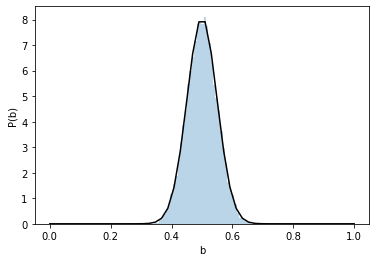

In [138]:
# plot a histogram of the sample
plt.hist(sample, bins=50, histtype="stepfilled", alpha=0.3, density=True)

# plot a best-fit Gaussian
b_fit = np.linspace(0,1)
pdf = stats.norm(np.mean(sample), np.std(sample)).pdf(b_fit)

plt.plot(b_fit, pdf, '-k')


plt.xlabel("b"); plt.ylabel("P(b)")

### with b_true = 0.7

Text(0, 0.5, 'P(b)')

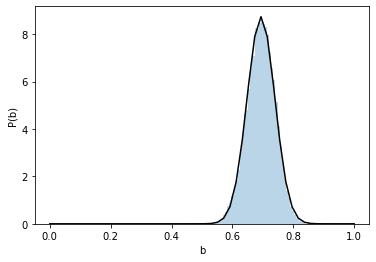

In [142]:
# plot a histogram of the sample
plt.hist(sample, bins=50, histtype="stepfilled", alpha=0.3, density=True)

# plot a best-fit Gaussian
b_fit = np.linspace(0,1)
pdf = stats.norm(np.mean(sample), np.std(sample)).pdf(b_fit)

plt.plot(b_fit, pdf, '-k')


plt.xlabel("b"); plt.ylabel("P(b)")

### with b_true = 0.2

Text(0, 0.5, 'P(b)')

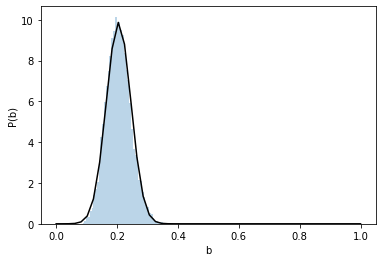

In [146]:
# plot a histogram of the sample
plt.hist(sample, bins=50, histtype="stepfilled", alpha=0.3, density=True)

# plot a best-fit Gaussian
b_fit = np.linspace(0,1)
pdf = stats.norm(np.mean(sample), np.std(sample)).pdf(b_fit)

plt.plot(b_fit, pdf, '-k')


plt.xlabel("b"); plt.ylabel("P(b)")